In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt  
import sklearn.model_selection as skm                      
from statsmodels.api import OLS, add_constant
from statsmodels.formula.api import ols
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt  
import sklearn.model_selection as skm
from sklearn.metrics import (accuracy_score,
                             log_loss)

from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [3]:
#load dataset
df = pd.read_stata('school_intervention_panel_final.dta', convert_categoricals=False)
#useful sub datasets 
follow_up_1_df = df[df['round'] == 0]
follow_up_2_df = df[df['round'] == 1]

/tmp/ipykernel_71/680550418.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata('school_intervention_panel_final.dta', convert_categoricals=False)


In [4]:
df_renamed = df
df_renamed = df_renamed.rename(columns={
    'female' : 'Student is female (Baseline)',
    'miss_f_coded' : 'Student gender could not be coded based on name (Baseline)',
    'dumm_rp_08_bl' : 'Education of mother: At least some secondary (Baseline)',
    'dumm_rp_09_bl' : 'Education of father: At least some secondary (Baseline)',
    'dumm_rp_14_bl' : 'Student\'s Family receives Bolsa Familia cash transfer (Baseline)',
    'dumm_rp_23_bl' : 'Student has computer with internet at home (Baseline)',
    'dumm_rp_24_bl' : 'Student has failed at least one school year (Baseline)',
    'dumm_rp_49_bl' : 'Student is not working at the moment (Baseline)',
    'business_bl' : 'Student works in own or family business (Baseline)',
    'employee_bl' : 'Student works as employee or other (Baseline)',
    'dumm_rp_50_bl' : 'Student receives income (Baseline)',
    'dumm_rp_53B_bl' : 'Student part of income saved is non-zero (Baseline)',
    'dumm_rp_55_bl' : 'Student has borrowed money (any source) (Baseline)',
    'dumm_rp_56_bl' : 'Student is behind on payments (unconditional) (Baseline)',
    'dumm_rp_57s_bl' : 'Student is behind on payments to store (Baseline)',
    'dumm_rp_57i_bl' : 'Student is behind on payments to family friends or other people (Baseline)',
    'dumm_rp_57f_bl' : 'Student is behind on payments to bank or FI (Baseline)',
    'dumm_rp_59_bl' : 'Student says they are a saver (Baseline)',
    'dumm_rp_61_bl' : 'Student has formal savings (Baseline)',
    'dumm_rp_64A_bl' : 'Student makes a list of all monthly expenses (Baseline)',
    'dumm_rp_65A_bl': 'Student saves money for future purchases (Baseline)',
    'dumm_rp88__92C_bl': 'Student has bought electronics shoes or clothing with credit card (Baseline)',
    'dumm_rp88__92D_bl': 'Student has bought electronics shoes or clothing on installments (Baseline)',
    'dumm_rp88__92AB_bl': 'Student has bought electronics shoes or clothing with cash/debit card (Baseline)',
    'dumm_negotiates_bl': 'Student negotiates prices or payment methods (Baseline)',
    'dumm_search_bl': 'Student comparison shops before making purchase (Baseline)',
    'dumm_rp_08p_bl': 'Parent has at least some secondary education (Baseline)',
    'p_employee_bl': 'Parent is an employee (Baseline)',
    'p_selfempl_bl': 'Parent is self-employeed (Baseline)',
    'p_other_bl': 'Parent occupation is other (homemaker, retired, unemployed, other) (Baseline)',
    'dumm_rp_14p_bl': 'Parent: makes a list of all monthly expenses (Baseline)',
    'dumm_rp_18p_bl': 'Parent: has checking account (Baseline)',
    'dumm_rp_18p_bl': 'Parent: has savings account (Baseline)',
    'dumm_rp_19p_bl': 'Parent: has debit card (Baseline)',
    'dumm_rp_23p_bl': 'Parent: has checks (Baseline)',
    'dumm_formal_saving_bl':' Parent: has formal savings (Baseline)',
    'dumm_rp_33p_bl': 'Parent: Student talks to you about finances (Baseline)',
    'dumm_rp_34p_bl': 'Parent: Student helps organize HH budget (Baseline)',
    'dumm_rp_36p_bl': 'Parent: Prefers R50K plus 15 percent interest (Baseline)',
    'dumm_rp_37p_bl': 'Parent: Inflation question dummy for correct (Baseline)',
    'vl_proficiencia_bl': 'Student: Finanical Proficieny Score (Baseline)', 
    'dumm_rp_49_fup' : "Student is not working at the moment" ,  
    'business_fup' : 'Student works in own or family busines' ,
    'employee_fup' : 'Student works as employee or other', 
    'dumm_rp_50_fup': 'Student: Receives income' ,
     'dumm_rp_53B_fup': 'Student: Pct of income saved is non-zero', 
    'dumm_rp_55_fup': 'Student: Has borrowed money (any source)',
    'dumm_rp_56_fup' : 'Student: Is behind on payments (unconditional)',
    'dumm_rp_57f_fup' : 'Student: Is behind on payments to bank or FI' ,
    'dumm_rp_57s_fup' : 'Student: Is behind on payments to store',
    'dumm_rp_57i_fup': 'Student: Is behind on payments to family friends or other people', 
    'dumm_rp_59_fup' : 'Student: Says they are a saver' , 
    'dumm_rp_61_fup' : 'Student: Has formal savings', 
    'dumm_rp_64A_fup' : 'I make a list of all monthly expenses', 
    'dumm_rp_65A_fup' : 'Student: Saves money for future purchases',
    'dumm_rp_88C_fup': 'Student: I have bought cell phone with credit card', 
    'dumm_rp_88D_fup': 'Student: I have bought cell phone on installments',
    'dumm_rp_88AB_fup': 'Student: I have bought a cell phone with cash/debit card',
    'dumm_rp_89C_fup': 'Student: I have bought computer with credit card' ,
    'dumm_rp_89D_fup': 'Student: I have bought computer on installments' ,
    'dumm_rp_89AB_fup': 'Student: I have bought a computer with cash/debit card' ,
    'dumm_rp_90C_fup': 'Student: I have bought an electronic device with credit card' ,
    'dumm_rp_90D_fup': 'Student: I have bought an electronic device on installments' ,
    'dumm_rp_90AB_fup': 'Student: I have bought an electronic device with cash/debit card' ,
    'dumm_rp_91C_fup': 'Student: I have bought shoes with credit card' ,
    'dumm_rp_91D_fup': 'Student: I have bought shoes on installments' ,
    'dumm_rp_91AB_fup': 'Student: I have bought shoes with cash/debit card',
    'dumm_rp_92C_fup': 'Student: I have bought clothing with credit card', 
    'dumm_rp_92D_fup': 'Student: I have bought clothing on installments' ,
    'dumm_rp_92AB_fup' : 'Student: I have bought clothing with cash/debit card',
    'dumm_rp88__92C_fup': 'I have bought electronics shoes or clothing with credit card',
    'dumm_rp88__92D_fup': 'I have bought electronics shoes or clothing on installments' ,
    'dumm_rp88__92AB_fup': 'I have bought electronics shoes or clothing with cash/debit card' ,
    'dumm_rp_93_fup': 'I negotiate the price' ,
    'dumm_rp_94_fup': 'Student I search price in different stores',
    'dumm_rp_95_fup': 'Student I negotiate the payment method' ,
    'dumm_rp_96_fup': 'Student: I search similar models/brands' ,
    'dumm_negotiates_fup': 'Student Negotiates prices or payment methods' ,
    'dumm_search_fup': 'Student Comparison shops before making purchase' ,
    'dumm_rp_08p_fup': 'Parent has at least some secondary education' ,
    'p_employee_fup': 'Parent is an employee' ,
    'p_selfempl_fup': 'Student Parent is self-employeed',
    'p_other_fup': 'Student Parent\'s occupation is other (homemaker, retired, unemployed, other)',
    'dumm_rp_14p_fup': 'Parent: makes a list of all monthly expenses',
    'dumm_rp_18p_fup' : 'Parent: has checking account', 
    'dumm_rp_19p_fup': 'Parent: savings account', 
    'dumm_rp_21p_fup': 'Parent has debit card' ,
    'dumm_rp_23p_fup': 'Parent has checks' ,
    'dumm_formal_saving_fup': 'Parent has formal savings',
    'dumm_rp_33p_fup': 'Parent: Student talks to you about finances' ,
    'dumm_rp_34p_fup': 'Parent: student helps organize HH budget',
    'dumm_rp_36p_fup' : 'Parent: prefers R50K plus 15 percent interest (follow up)',
    'dumm_rp_37p_fup' : 'Parent: Inflation question dummy for correct  (follow up)', 
    'dumm_rp_41p_fup' : 'Parent: budget must have income and expenses (follow up)',

})

follow_up_1_df = df_renamed[df_renamed['round'] == 0]
follow_up_2_df = df_renamed[df_renamed['round'] == 1]

baseline_columns = ['Student is female (Baseline)', 
'Student has failed at least one school year (Baseline)',
'Student has computer with internet at home (Baseline)', 
'Student is not working at the moment (Baseline)', 
'Student works in own or family business (Baseline)', 
'Student works as employee or other (Baseline)', 
'Student receives income (Baseline)', 'Student part of income saved is non-zero (Baseline)', 
'Student has borrowed money (any source) (Baseline)', 
'Student is behind on payments (unconditional) (Baseline)', 
'Student says they are a saver (Baseline)', 
'Student has formal savings (Baseline)', 
'Student makes a list of all monthly expenses (Baseline)', 
'Student saves money for future purchases (Baseline)',
'Student has bought electronics shoes or clothing with credit card (Baseline)', 
'Student has bought electronics shoes or clothing on installments (Baseline)', 
'Student has bought electronics shoes or clothing with cash/debit card (Baseline)',
'Student negotiates prices or payment methods (Baseline)',
'Student comparison shops before making purchase (Baseline)', 'Education of mother: At least some secondary (Baseline)', 
'Education of father: At least some secondary (Baseline)', 
'Parent is an employee (Baseline)', 
'Parent is self-employeed (Baseline)', 
'Parent occupation is other (homemaker, retired, unemployed, other) (Baseline)', 
"Student's Family receives Bolsa Familia cash transfer (Baseline)", 'Parent: makes a list of all monthly expenses (Baseline)', 
'Parent: has savings account (Baseline)',
'Parent: has debit card (Baseline)', 
'Parent: has checks (Baseline)', 
' Parent: has formal savings (Baseline)', 
'Parent: Prefers R50K plus 15 percent interest (Baseline)', 
'Parent: Inflation question dummy for correct (Baseline)',  
    'Parent: Student talks to you about finances (Baseline)',
    'Parent: Student helps organize HH budget (Baseline)']

## OLS Difference in Means Analysis 

### follow up 2 (OLS) 

In [5]:
#difference in baseline survey responses between the treatment and the control group
#for those not present in follow up 2

#same observations kept as used in OLS Regression
filter_df = follow_up_2_df.dropna(subset=['treatment', 'round', 'cd_escola']).copy()
#na values in column indicating presence at follow up two replaced by 0
filter_df['fu2_aluno'] = filter_df['fu2_aluno'].fillna(0)
#drop all observations with na values indicating presence at baseline 
filter_df = filter_df.dropna(subset=['bl_aluno'])
#column indicating dropping out from baseline to follow up 2 
filter_df = filter_df[(filter_df['bl_aluno'] == 1) & (filter_df['fu2_aluno'] == 1)]

results = []
#clustered standard errors used in line with bruhn et al.
for var in baseline_columns:
    #remove rows with na values for just baseline property being analyzed  
    filter_df_temp = filter_df.dropna(subset=[var])
    
    #OLS reg (clustered standard errors by `cd_escola`) 
    model = smf.ols(f'Q("{var}") ~ treatment', data=filter_df_temp).fit(cov_type='cluster', cov_kwds={'groups': filter_df_temp['cd_escola']})

    #p-value for the treatment effect (two-tailed)
    p_value = model.pvalues['treatment']
    
    # Get the means for the treatment and control groups
    treatment_mean = filter_df_temp.loc[filter_df_temp['treatment'] == 1, var].mean()
    control_mean = filter_df_temp.loc[filter_df_temp['treatment'] == 0, var].mean()
    
    # Get standard deviations for the treatment and control groups
    treatment_sd = filter_df_temp.loc[filter_df_temp['treatment'] == 1, var].std()
    control_sd = filter_df_temp.loc[filter_df_temp['treatment'] == 0, var].std()
    
    # Number of observations used in the sample
    sample_size = filter_df_temp[var].notna().sum()
    
    results.append({
        'Variable': var,
        'Treatment Mean': treatment_mean,
        'Control Mean': control_mean,
        'Treatment SD': treatment_sd,
        'Control SD': control_sd,
        'P-value': p_value,
        'N': sample_size
    })

#print results
results_df = pd.DataFrame(results)
#print(results_df)
#print variables that are significantly different 
significant_var = results_df[results_df['P-value'] < 0.05]
print(significant_var)
print(significant_var['Variable'])

                                             Variable  Treatment Mean  \
9   Student is behind on payments (unconditional) ...        0.079018   
18  Student comparison shops before making purchas...        0.938783   
25  Parent: makes a list of all monthly expenses (...        0.351852   

    Control Mean  Treatment SD  Control SD   P-value      N  
9       0.063895      0.269796    0.244595  0.010199  11175  
18      0.925682      0.239756    0.262312  0.009040  11263  
25      0.380594      0.477590    0.485585  0.007043   9884  
9     Student is behind on payments (unconditional) ...
18    Student comparison shops before making purchas...
25    Parent: makes a list of all monthly expenses (...
Name: Variable, dtype: object


### follow up 1 (OLS) 

In [6]:
#difference in baseline survey responses between the treatment and the control group
#for those not present in follow up 1
#same observations kept as used in OLS Regression
filter_df = follow_up_1_df.dropna(subset=['treatment', 'round', 'cd_escola']).copy()
#na values in column indicating presence at follow up two replaced by 0
filter_df['fu1_aluno'] = filter_df['fu1_aluno'].fillna(0)
#drop all observations with na values indicating presence at baseline 
filter_df = filter_df.dropna(subset=['bl_aluno'])
#column indicating dropping out from baseline to follow up 1 
filter_df = filter_df[(filter_df['bl_aluno'] == 1) & (filter_df['fu1_aluno'] == 1)]

results = []
#clustered standard errors used in line with bruhn et al.
for var in baseline_columns:
    #remove rows with na values for just baseline property being analyzed  
    filter_df_temp = filter_df.dropna(subset=[var])
    
    #OLS reg (clustered standard errors by `cd_escola`) 
    model = smf.ols(f'Q("{var}") ~ treatment', data=filter_df_temp).fit(cov_type='cluster', cov_kwds={'groups': filter_df_temp['cd_escola']})

    #p-value two-tailed
    p_value = model.pvalues['treatment']
    
    #means 
    treatment_mean = filter_df_temp.loc[filter_df_temp['treatment'] == 1, var].mean()
    control_mean = filter_df_temp.loc[filter_df_temp['treatment'] == 0, var].mean()
    
    #standard deviations
    treatment_sd = filter_df_temp.loc[filter_df_temp['treatment'] == 1, var].std()
    control_sd = filter_df_temp.loc[filter_df_temp['treatment'] == 0, var].std()
    
    # number of observations
    sample_size = filter_df_temp[var].notna().sum()
    
    results.append({
        'Variable': var,
        'Treatment Mean': treatment_mean,
        'Control Mean': control_mean,
        'Treatment SD': treatment_sd,
        'Control SD': control_sd,
        'P-value': p_value,
        'N': sample_size
    })

#print results
results_df = pd.DataFrame(results)
#print(results_df)
#print variables that are significantly different 
significant_var = results_df[results_df['P-value'] < 0.05]
print(significant_var)
#print(significant_var['Variable'])

                                            Variable  Treatment Mean  \
0                       Student is female (Baseline)        0.573181   
9  Student is behind on payments (unconditional) ...        0.085234   

   Control Mean  Treatment SD  Control SD   P-value      N  
0      0.548755      0.494633    0.497655  0.015305  13922  
9      0.071707      0.279245    0.258007  0.010388  15174  


## Decision Tree Method
 Can a decision tree use baseline factors to predict treatment vs control group amoungest the student who drop out of the study? 

0.5038495445195416
0.007267515902036427


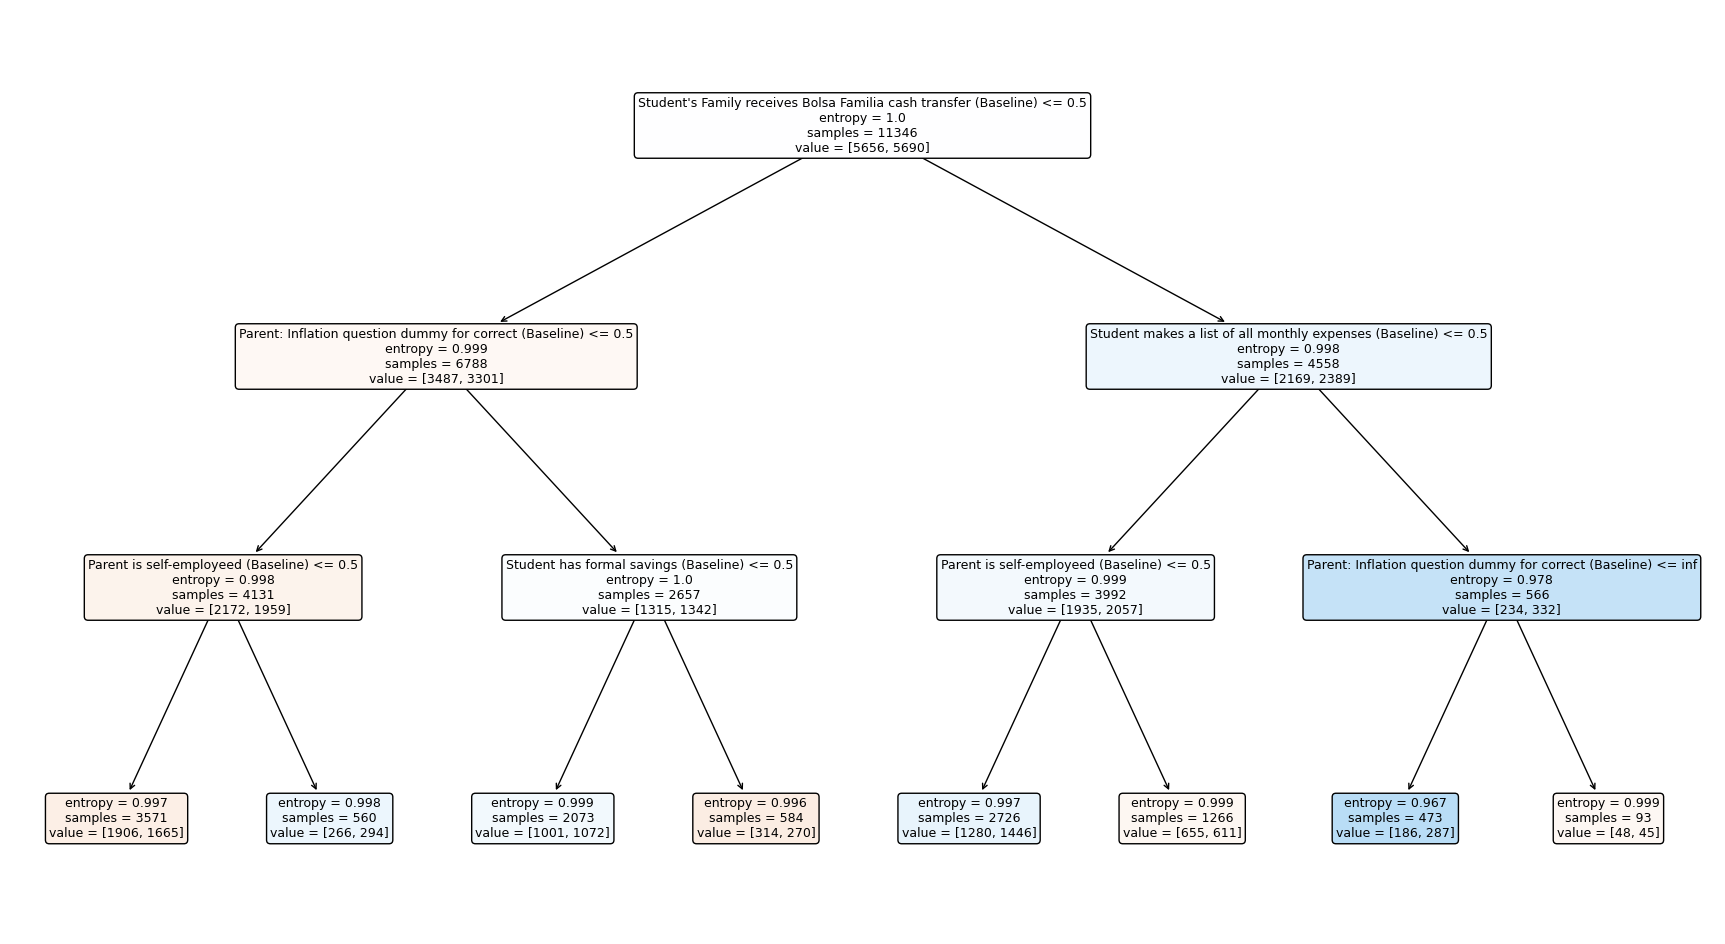

In [7]:
#predict treatment vs control for those who drop out of the 2nd follow up survey 

#same observations kept as used in OLS Regression
filter_df = follow_up_2_df.dropna(subset=['treatment', 'round', 'cd_escola']).copy()
#na values in column indicating presence at follow up two replaced by 0
filter_df['fu2_aluno'].fillna(0, inplace=True)
#drop all observations with na values indicating presence at baseline 
filter_df = filter_df.dropna(subset=['bl_aluno'])
#column indicating dropping out from baseline to follow up 2 
filter1 = filter_df[(filter_df['bl_aluno'] == 1) & (filter_df['fu2_aluno'] == 1)]

Y = filter1['treatment']
X = filter1[baseline_columns]

feature_names = list(X.columns)
clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)        
clf.fit(X, Y)

ax = subplots(figsize=(22,12))[1]
plot_tree(clf,
          feature_names=feature_names,
          filled=True, 
          rounded=True, 
          fontsize=9,
          ax=ax,
          max_depth=9);

#cross validation with 10 splits and 30% test size  
validation = skm.ShuffleSplit(n_splits=10,
                              test_size=int(int(len(filter1))*0.3),
                              random_state=42)

results = skm.cross_validate(clf,
                             X,
                             Y,
                             cv=validation)

results['test_score']  
mean_score = np.mean(results['test_score'])
std_score = np.std(results['test_score'])

print(mean_score)
print(std_score)

0.5139152981849611
0.007849957272020428


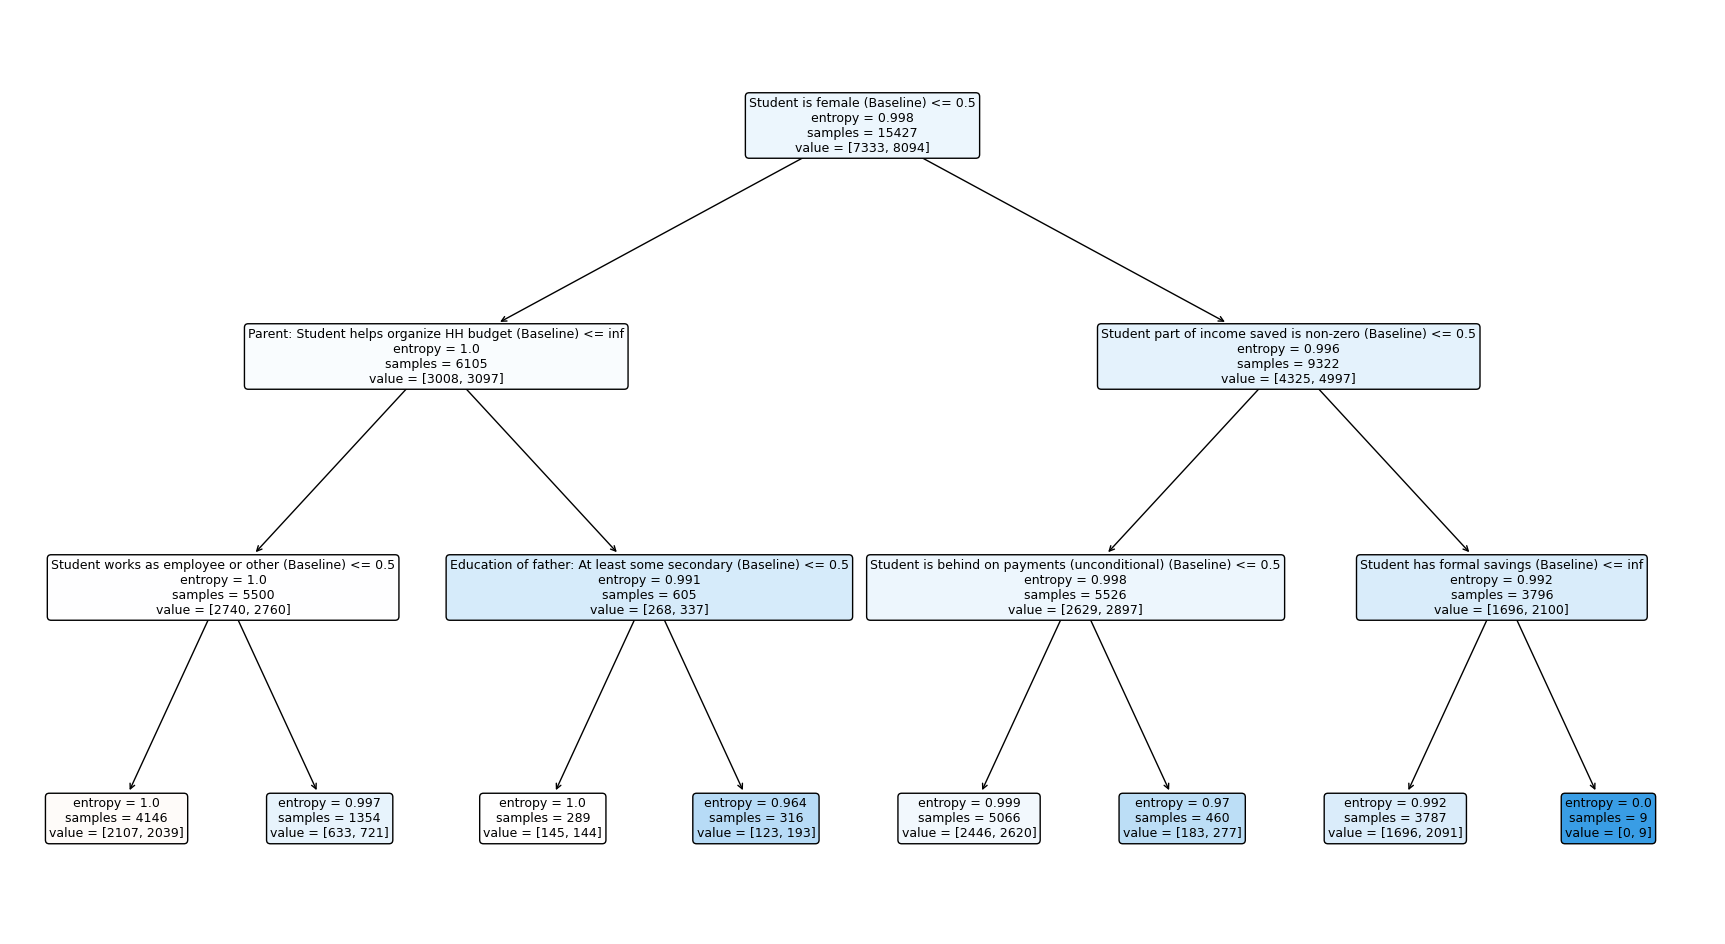

In [8]:
#predict treatment vs control for those who drop out of the 1st follow up survey 
from sklearn.model_selection import RandomizedSearchCV, train_test_split

#same observations kept as used in OLS Regression
filter_df = follow_up_1_df.dropna(subset=['treatment', 'round', 'cd_escola']).copy()
#na values in column indicating presence at follow up two replaced by 0
filter_df['fu1_aluno'].fillna(0, inplace=True)
#drop all observations with na values indicating presence at baseline 
filter_df = filter_df.dropna(subset=['bl_aluno'])
#column indicating dropping out from baseline to follow up 1
filter1 = filter_df[(filter_df['bl_aluno'] == 1) & (filter_df['fu1_aluno'] == 1)]

Y = filter1['treatment']
X = filter1[baseline_columns]
feature_names = list(X.columns)
clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)        
clf.fit(X, Y)

ax = subplots(figsize=(22,12))[1]
plot_tree(clf,
          feature_names=feature_names,
          filled=True, 
          rounded=True, 
          fontsize=9,
          ax=ax,
          max_depth=9);

#subplots.savefig('decision_tree.png', dpi=300)

#cross validation with 10 splits and 30% test size  
validation = skm.ShuffleSplit(n_splits=10,
                              test_size=int(int(len(filter1))*0.3),
                              random_state=42)

results = skm.cross_validate(clf,
                             X,
                             Y,
                             cv=validation)

results['test_score']  
mean_score = np.mean(results['test_score'])
std_score = np.std(results['test_score'])

print(mean_score)
print(std_score)

https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.ShuffleSplit.html
ShuffleSplit: contrary to other cross-validation strategies, random splits do not guarantee that test sets across all folds will be mutually exclusive, and might include overlapping samples. However, this is still very likely for sizeable datasets

## Random Forest

treatment/control is a binary outcome so RandomForestClassifier needed 
code sources: 
- https://www.datacamp.com/tutorial/random-forests-classifier-python
- https://www.kaggle.com/code/wrecked22/basic-binary-classification-using-xgboost

### Drop out of follow up 1

In [9]:
#using baseline variables to predict treatment/control for 
#those who dropout by the 1st follow-up survey 

clean_df_f = follow_up_1_df.copy()
clean_df_f.dropna(subset=baseline_columns , inplace=True)
clean_df_f.dropna(subset='treatment' , inplace=True)
#include only students dropping out from baseline to follow up 1 
filter1 = filter_df[(filter_df['bl_aluno'] == 1) & (filter_df['fu1_aluno'] == 1)]

X = clean_df_f[baseline_columns]
Y = clean_df_f['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.3, 
                                                    random_state=42)

In [10]:
#hyperparamater tunning 
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
rf = RandomForestClassifier()
#random search to find the best hyperparameters
#5-fold cross-validation used 
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

#fit the random search object to the data
rand_search.fit(X_train, y_train)
#create best model variable and return best hyperparameters
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 292}


In [11]:
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5177501152604888


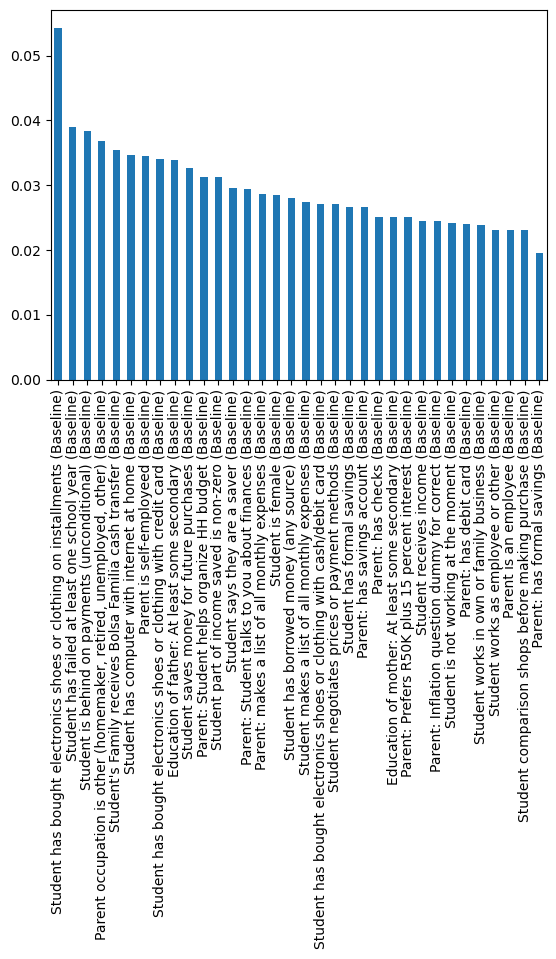

In [12]:
#create feature importance matrix 
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar();

### Drop out of follow up 2

In [13]:
#using baseline variables to predict treatment/control for 
#those who dropout by the 2nd follow-up survey 

clean_df_f = follow_up_2_df.copy()
clean_df_f.dropna(subset=baseline_columns , inplace=True)
clean_df_f.dropna(subset='treatment' , inplace=True)
#include only students dropping out from baseline to follow up 2 
filter1 = filter_df[(filter_df['bl_aluno'] == 1) & (filter_df['fu2_aluno'] == 1)]

X = clean_df_f[baseline_columns]
Y = clean_df_f['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.3, 
                                                    random_state=42)

In [14]:
#hyperparamater tunning 
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
rf = RandomForestClassifier()
#random search to find the best hyperparameters
#5-fold cross-validation used 
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

#fit the random search object to the data
rand_search.fit(X_train, y_train)
#create best model variable and return best hyperparameters
best_rf = rand_search.best_estimator_
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'n_estimators': 246}


In [15]:
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5154449054863992


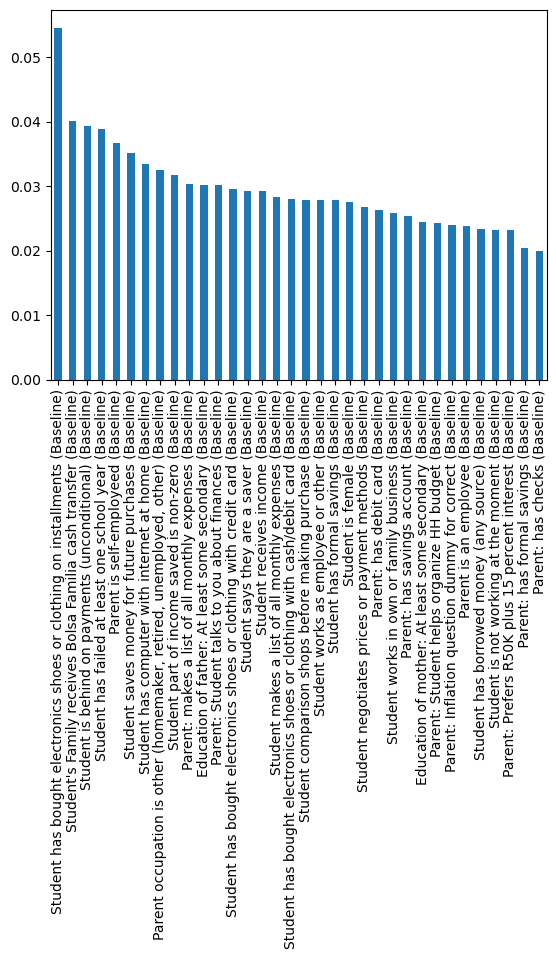

In [16]:
#create feature importance matrix 
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar();

## X Boosting 

https://www.kaggle.com/code/wrecked22/basic-binary-classification-using-xgboost

In [17]:
! pip install xgboost
from xgboost import XGBClassifier

  Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl.metadata (2.1 kB)
  Using cached nvidia_nccl_cu12-2.23.4-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
Using cached xgboost-2.1.3-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)
Using cached nvidia_nccl_cu12-2.23.4-py3-none-manylinux2014_x86_64.whl (199.0 MB)


### Drop out of follow up 1 (XGB)

In [18]:
clean_df_f = follow_up_1_df.copy()
clean_df_f.dropna(subset=baseline_columns , inplace=True)
clean_df_f.dropna(subset='treatment' , inplace=True)
#include only students dropping out from baseline to follow up 1 
filter1 = filter_df[(filter_df['bl_aluno'] == 1) & (filter_df['fu1_aluno'] == 1)]

X = clean_df_f[baseline_columns]
Y = clean_df_f['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.3, 
                                                    random_state=42)

model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=np.nan, n_estimators=7, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=2)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=7,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=7,
              n_jobs=-1, nthread=None, num_parallel_tree=None, ...)

In [19]:
from sklearn import metrics
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.5043798985707699

### Drop out of follow up 2 (XGB)

In [20]:
clean_df_f = follow_up_2_df.copy()
clean_df_f.dropna(subset=baseline_columns , inplace=True)
clean_df_f.dropna(subset='treatment' , inplace=True)
#include only students dropping out from baseline to follow up 1 
filter1 = filter_df[(filter_df['bl_aluno'] == 1) & (filter_df['fu2_aluno'] == 1)]

X = clean_df_f[baseline_columns]
Y = clean_df_f['treatment']

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.3, 
                                                    random_state=42)

model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=np.nan, n_estimators=7, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=2)

model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=7,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=7,
              n_jobs=-1, nthread=None, num_parallel_tree=None, ...)

In [21]:
from sklearn import metrics
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.5043798985707699